# Model Training & Evaluation

## Objective
Train and compare multiple machine learning classification models for the
E-commerce Product Prediction problem. The best model is selected based on
F1 score and ROC-AUC, and evaluated using industry-standard metrics.

### Models Used
- Logistic Regression
- K-Nearest Neighbors (KNN)
- Decision Tree
- Random Forest
- Gradient Boosting
- XGBoost

### Evaluation Metrics
- Accuracy
- Confusion Matrix (Visualization)
- Classification Report
- ROC-AUC (with ROC Curve)


In [25]:
# Install required libraries 
%pip install xgboost decision-tree-id3

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
# Core libraries
import sys
from pathlib import Path
import json
import joblib
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML utilities
from typing import List, Tuple
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

# Add project root to path for imports
sys.path.insert(0, str(Path.cwd().parent))

# Config import
from src.config import (
    DATA_FILE,
    MODEL_DIR,
    BEST_MODEL_PATH,
    FEATURES_PATH,
    CV_FOLDS,
    SCORING,
    N_JOBS
)


### Data loading & Train Test-Split

In [27]:
# Load cleaned dataset
df = pd.read_csv(DATA_FILE)

# Separate features and target
X = df.drop(columns=[df.columns[-1]])
y = df[df.columns[-1]]

# Train–test split (stratified for class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# --------------------------------------------------
# Save feature list for inference (REQUIRED for app)
# --------------------------------------------------
MODEL_DIR.mkdir(parents=True, exist_ok=True)

feature_list = X_train.columns.tolist()

with open(FEATURES_PATH, "w", encoding="utf-8") as f:
    json.dump(feature_list, f, indent=2)

print(f"✅ Feature list saved at: {FEATURES_PATH}")

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


✅ Feature list saved at: D:\E-Commerce Product Prediction\E-Commerce_product\models\feature_list.json
Train shape: (8799, 11)
Test shape: (2200, 11)


### Preprocessing Pipeline

In [28]:
# Identify column types
num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X_train.select_dtypes(include=["object"]).columns

# Numerical pipeline
num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ]
)

# Categorical pipeline
cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
    ]
)

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_cols),
        ("cat", cat_pipeline, cat_cols)
    ]
)

## Models

In [29]:
models_and_params: List[Tuple[str, object, dict]] = [

    ("logistic_regression",
     LogisticRegression(max_iter=1000, random_state=42),
     {"clf__C": [0.1, 1.0]}),

    ("knn",
     KNeighborsClassifier(),
     {"clf__n_neighbors": [5, 7, 9]}),

    ("decision_tree",
     DecisionTreeClassifier(random_state=42),
     {"clf__max_depth": [None, 5, 10]}),

    ("random_forest",
     RandomForestClassifier(random_state=42),
     {"clf__n_estimators": [100, 200]}),

    ("gradient_boosting",
     GradientBoostingClassifier(random_state=42),
     {"clf__n_estimators": [100, 200]}),

    ("xgboost",
     XGBClassifier(
         objective="binary:logistic",
         eval_metric="logloss",
         random_state=42,
         use_label_encoder=False
     ),
     {
         "clf__n_estimators": [100, 200],
         "clf__learning_rate": [0.05, 0.1]
     })
]


## Training, Evaluation & Visualization


Training Model: LOGISTIC_REGRESSION
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Saved logistic_regression best model at: D:\E-Commerce Product Prediction\E-Commerce_product\models\logistic_regression_best_model.joblib
Accuracy: 0.6536
ROC-AUC: 0.7340

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.63      0.59       887
           1       0.73      0.67      0.70      1313

    accuracy                           0.65      2200
   macro avg       0.65      0.65      0.65      2200
weighted avg       0.66      0.65      0.66      2200



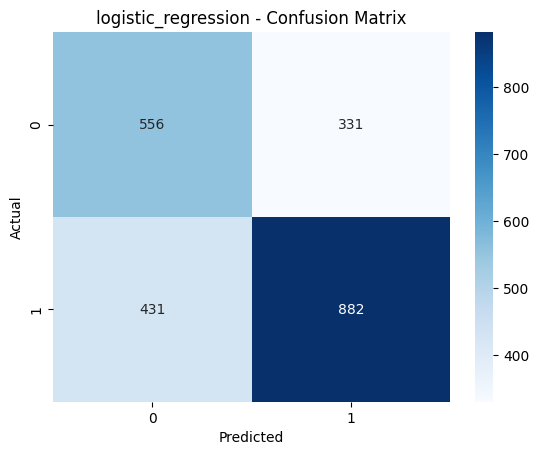

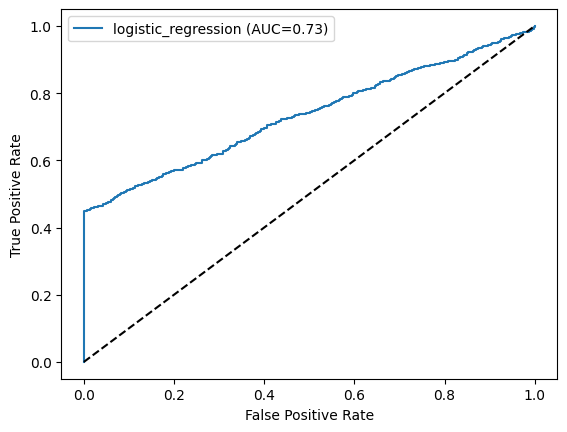


Training Model: KNN
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Saved knn best model at: D:\E-Commerce Product Prediction\E-Commerce_product\models\knn_best_model.joblib
Accuracy: 0.6418
ROC-AUC: 0.7296

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.61      0.58       887
           1       0.71      0.67      0.69      1313

    accuracy                           0.64      2200
   macro avg       0.63      0.64      0.63      2200
weighted avg       0.65      0.64      0.64      2200



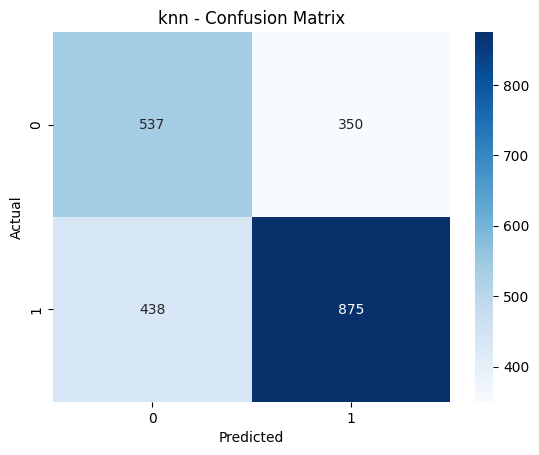

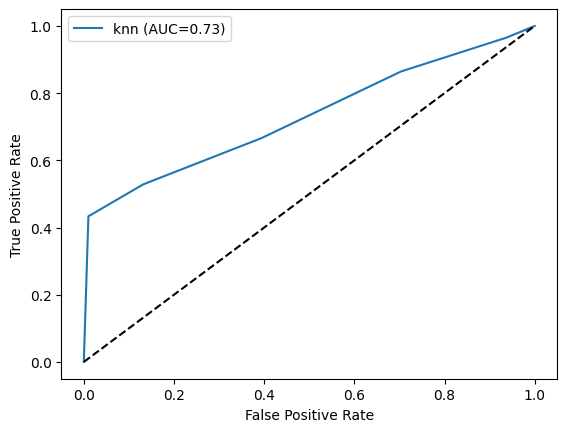


Training Model: DECISION_TREE
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Saved decision_tree best model at: D:\E-Commerce Product Prediction\E-Commerce_product\models\decision_tree_best_model.joblib
Accuracy: 0.6436
ROC-AUC: 0.6268

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.54      0.55       887
           1       0.70      0.71      0.71      1313

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200



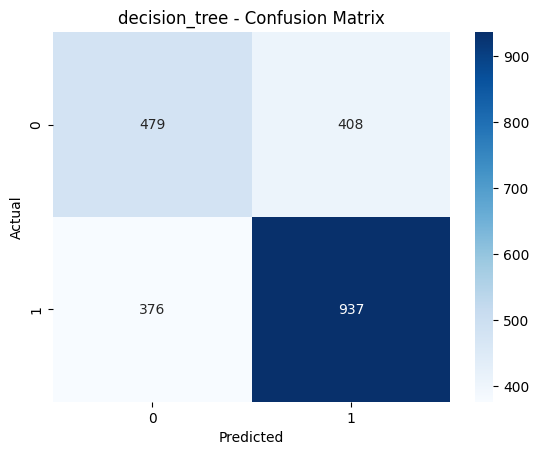

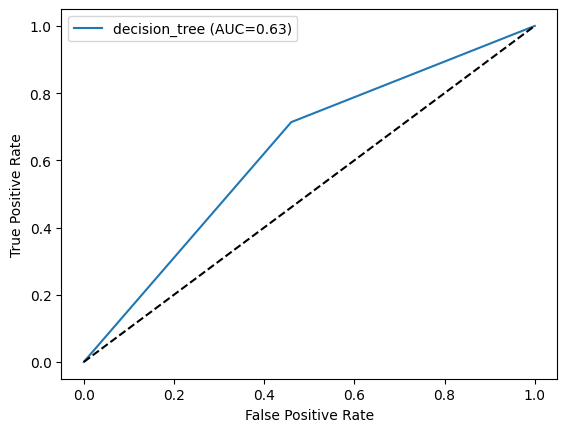


Training Model: RANDOM_FOREST
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Saved random_forest best model at: D:\E-Commerce Product Prediction\E-Commerce_product\models\random_forest_best_model.joblib
Accuracy: 0.6582
ROC-AUC: 0.7330

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.75      0.64       887
           1       0.78      0.59      0.68      1313

    accuracy                           0.66      2200
   macro avg       0.67      0.67      0.66      2200
weighted avg       0.69      0.66      0.66      2200



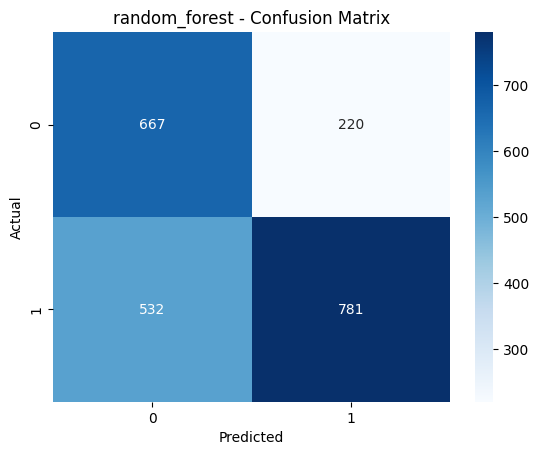

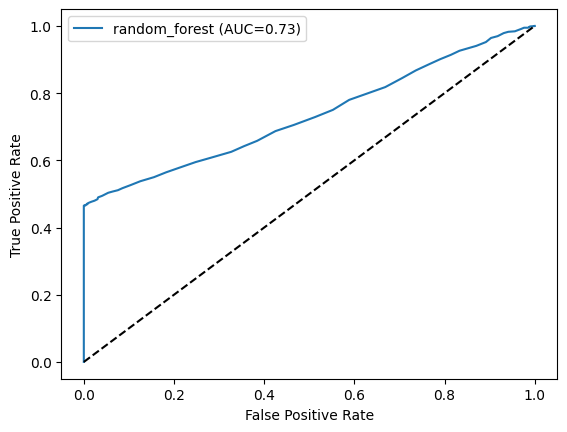


Training Model: GRADIENT_BOOSTING
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Saved gradient_boosting best model at: D:\E-Commerce Product Prediction\E-Commerce_product\models\gradient_boosting_best_model.joblib
Accuracy: 0.6727
ROC-AUC: 0.7476

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.87      0.68       887
           1       0.86      0.54      0.66      1313

    accuracy                           0.67      2200
   macro avg       0.71      0.70      0.67      2200
weighted avg       0.74      0.67      0.67      2200



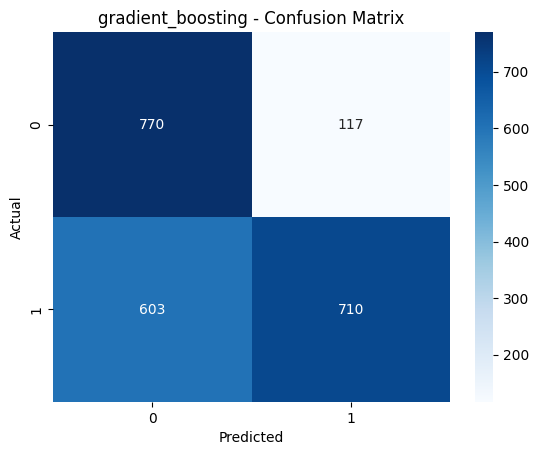

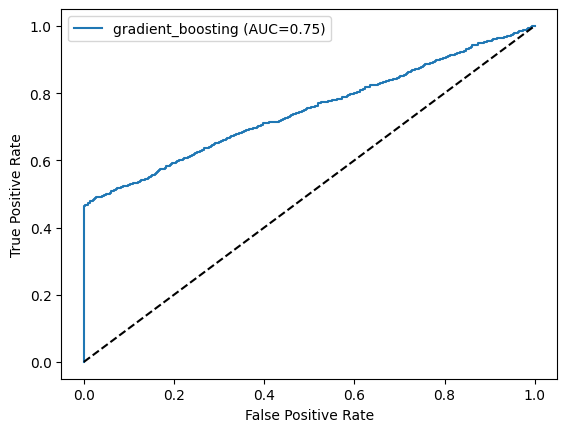


Training Model: XGBOOST
Fitting 5 folds for each of 4 candidates, totalling 20 fits


d:\E-Commerce Product Prediction\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:33:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Saved xgboost best model at: D:\E-Commerce Product Prediction\E-Commerce_product\models\xgboost_best_model.joblib
Accuracy: 0.6632
ROC-AUC: 0.7402

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.72      0.63       887
           1       0.77      0.62      0.69      1313

    accuracy                           0.66      2200
   macro avg       0.67      0.67      0.66      2200
weighted avg       0.69      0.66      0.67      2200



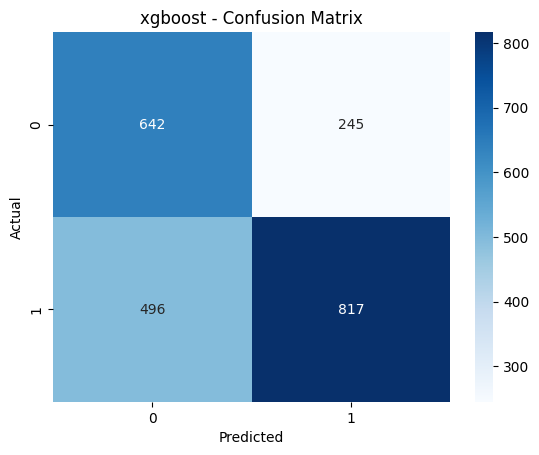

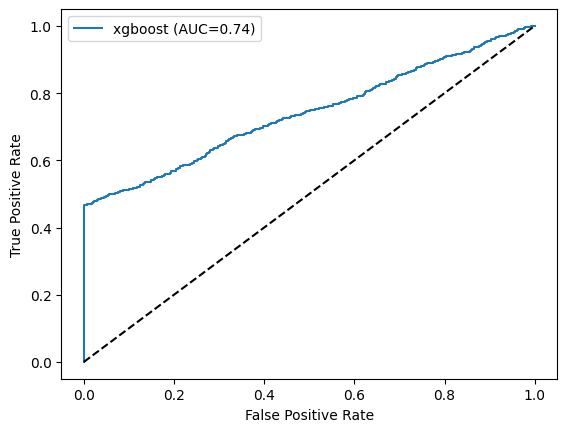


✅ Overall Best Model: gradient_boosting (ROC-AUC: 0.7476)
Saved at: D:\E-Commerce Product Prediction\E-Commerce_product\models\best_model.joblib


In [30]:
best_model = None
best_score = -1
best_model_name = None

# Ensure model directory exists
MODEL_DIR.mkdir(parents=True, exist_ok=True)

for name, model, params in models_and_params:

    print(f"\n==============================")
    print(f"Training Model: {name.upper()}")
    print(f"==============================")

    pipeline = Pipeline(
        steps=[
            ("preprocess", preprocessor),
            ("clf", model)
        ]
    )

    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=params,
        cv=CV_FOLDS,
        scoring=SCORING,
        n_jobs=N_JOBS,
        verbose=1
    )

    # -----------------------------
    # Train model
    # -----------------------------
    grid.fit(X_train, y_train)
    best_estimator = grid.best_estimator_

    # -----------------------------
    # SAVE EACH MODEL (IMPORTANT)
    # -----------------------------
    model_path = MODEL_DIR / f"{name}_best_model.joblib"
    joblib.dump(best_estimator, model_path)
    print(f"Saved {name} best model at: {model_path}")

    # -----------------------------
    # Predictions
    # -----------------------------
    y_pred = best_estimator.predict(X_test)
    y_proba = best_estimator.predict_proba(X_test)[:, 1]

    # -----------------------------
    # Evaluation Metrics
    # -----------------------------
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)

    print(f"Accuracy: {acc:.4f}")
    print(f"ROC-AUC: {roc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # -----------------------------
    # Confusion Matrix (Heatmap)
    # -----------------------------
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # -----------------------------
    # ROC Curve
    # -----------------------------
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    # -----------------------------
    # Best Model Selection
    # -----------------------------
    if roc > best_score:
        best_score = roc
        best_model = best_estimator
        best_model_name = name


# -----------------------------
# SAVE OVERALL BEST MODEL
# -----------------------------
joblib.dump(best_model, BEST_MODEL_PATH)

print(
    f"\n✅ Overall Best Model: {best_model_name} "
    f"(ROC-AUC: {best_score:.4f})"
)
print(f"Saved at: {BEST_MODEL_PATH}")


## Save final best model

In [31]:
MODEL_DIR.mkdir(exist_ok=True)

joblib.dump(best_model, BEST_MODEL_PATH)

print(f"\n✅ Best model saved at: {BEST_MODEL_PATH}")



✅ Best model saved at: D:\E-Commerce Product Prediction\E-Commerce_product\models\best_model.joblib
